<a href="https://colab.research.google.com/github/UtkarshAIITB/IPL-Data-Analysis/blob/main/DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [451]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [452]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [453]:
new = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IPL Score_Analysis/CSV/new.csv')
# new.head()

In [454]:
t = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IPL Score_Analysis/CSV/t.csv')
# t.head()

In [455]:
t.drop(columns = ['Unnamed: 0'], inplace = True)
t.head()

,id,date,team1,team2,toss_winner,winner,inning,over,batting_team,bowling_team,year,field,D/L,eliminator?,total_runs_y,cum_total,cum_wicket
0,597998,2013-04-03,9,6,9,9,1,0.1,6,9,2013,1,0,0,128,0,1
1,597998,2013-04-03,9,6,9,9,1,0.2,6,9,2013,1,0,0,128,4,1
2,597998,2013-04-03,9,6,9,9,1,0.3,6,9,2013,1,0,0,128,5,1
3,597998,2013-04-03,9,6,9,9,1,0.4,6,9,2013,1,0,0,128,5,1
4,597998,2013-04-03,9,6,9,9,1,0.5,6,9,2013,1,0,0,128,5,1


In [456]:
new.drop(columns = ['Unnamed: 0'], inplace = True)

In [457]:
new.head()

,id,date,team1,team2,toss_winner,winner,inning,over,batting_team,bowling_team,year,field,D/L,eliminator?,total_runs_y,cum_total,cum_wicket
0,335982,2008-04-18,5,9,5,9,1,0.1,9,5,2008,1,0,0,222,1,0
1,335982,2008-04-18,5,9,5,9,1,0.2,9,5,2008,1,0,0,222,1,0
2,335982,2008-04-18,5,9,5,9,1,0.3,9,5,2008,1,0,0,222,2,0
3,335982,2008-04-18,5,9,5,9,1,0.4,9,5,2008,1,0,0,222,2,0
4,335982,2008-04-18,5,9,5,9,1,0.5,9,5,2008,1,0,0,222,2,0


In [458]:
# new is the training set and t is the test set

In [459]:
tnew = t.drop(t[(t.over < 15.5) | (t.over >=15.6)].index)
tnew.reset_index(drop = True)
y1test = tnew['total_runs_y']
y2test = tnew['winner']
tnew.drop(columns = ['id', 'date', 'year', 'total_runs_y', 'winner'], inplace = True)
tnew.reset_index(drop=True).head()

,team1,team2,toss_winner,inning,over,batting_team,bowling_team,field,D/L,eliminator?,cum_total,cum_wicket
0,9,6,9,1,15.5,6,9,1,0,0,98,6
1,9,6,9,2,15.5,9,6,1,0,0,104,4
2,5,12,12,1,15.5,5,12,1,0,0,106,5
3,5,12,12,2,15.5,12,5,1,0,0,105,3
4,7,2,2,1,15.5,7,2,1,0,0,91,4


In [460]:
xnew = new.drop(new[(new.over < 15.5) | (new.over >=15.6)].index)
xnew.reset_index(drop = True)
y1train = xnew['total_runs_y']
y2train = xnew['winner']
xnew.drop(columns = ['id', 'date', 'year', 'total_runs_y', 'winner'], inplace = True)
xnew.reset_index(drop=True).head()

,team1,team2,toss_winner,inning,over,batting_team,bowling_team,field,D/L,eliminator?,cum_total,cum_wicket
0,5,9,5,1,15.5,9,5,1,0,0,158,2
1,8,11,11,1,15.5,11,8,0,0,0,168,5
2,8,11,11,2,15.5,8,11,0,0,0,174,3
3,6,10,10,1,15.5,10,6,0,0,0,104,7
4,12,5,12,1,15.5,12,5,0,0,0,110,4


In [461]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [462]:
xnewt = sc.fit_transform(xnew) 
tnewt = sc.fit_transform(tnew)

In [463]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [464]:
model = Sequential()
# model.add(Dense(88, activation = 'relu'))
# model.add(Dropout(0.5))

model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(25, activation = 'relu'))
# model.add(Dropout(0.5))

model.add(Dense(12, activation = 'relu'))
# model.add(Dropout(0.5))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [465]:
history= model.fit(x=xnewt, y=y1train, epochs=180, 
          validation_data=(tnewt,y1test))

Epoch 1/180
43/43 [==============================] - 1s 6ms/step - loss: 25739.6758 - val_loss: 22379.2031
Epoch 2/180
43/43 [==============================] - 0s 4ms/step - loss: 23511.1406 - val_loss: 18586.4551
Epoch 3/180
43/43 [==============================] - 0s 3ms/step - loss: 16493.6406 - val_loss: 9217.1152
Epoch 4/180
43/43 [==============================] - 0s 3ms/step - loss: 6188.8511 - val_loss: 1782.9873
Epoch 5/180
43/43 [==============================] - 0s 3ms/step - loss: 2749.1938 - val_loss: 1186.4976
Epoch 6/180
43/43 [==============================] - 0s 3ms/step - loss: 2147.9973 - val_loss: 992.2705
Epoch 7/180
43/43 [==============================] - 0s 3ms/step - loss: 1801.9463 - val_loss: 910.0461
Epoch 8/180
43/43 [==============================] - 0s 3ms/step - loss: 1807.3666 - val_loss: 796.4891
Epoch 9/180
43/43 [==============================] - 0s 4ms/step - loss: 1656.3278 - val_loss: 756.0699
Epoch 10/180
43/43 [==============================] - 

In [466]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


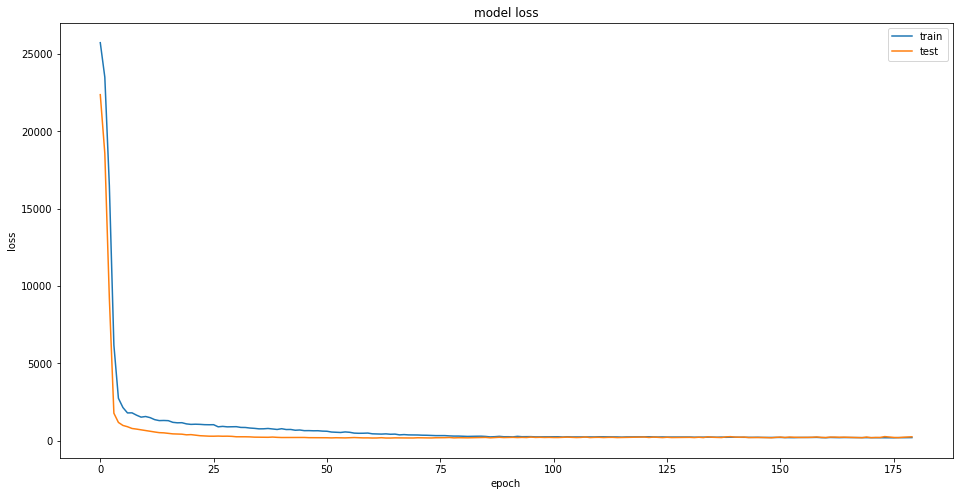

In [467]:
plt.figure(figsize=(16,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [468]:
y1test = y1test.ravel()

In [469]:
predictions = model.predict(tnewt)
sample = pd.DataFrame(predictions,columns=['Predict'])
sample['Actual']=y1test
sample.head(10)

,Predict,Actual
0,139.954071,128
1,146.653961,129
2,156.926636,156
3,151.140045,154
4,136.183685,126
5,122.493942,104
6,194.541168,165
7,170.596878,160
8,150.691620,148
9,139.329880,139


In [470]:
def custom_accuracy(y_test,y_pred,thresold):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)

In [471]:
custom_accuracy(sample['Actual'] , sample['Predict'],10)

44.21768707482993

In [472]:
# sample.to_csv('sample.csv')

In [473]:
# try1 = sample[sample.Actual == 128]
# try1.head()

In [474]:
# try1.shape[0]

In [475]:
# try1.sum()

In [476]:
# (try1.sum())/try1.shape[0]

In [477]:
# try2 = sample[sample.Actual == 129]
# (try2.sum())/try2.shape[0]

In [478]:
# try2 = sample[sample.Actual == 156]
# result = (try2.sum())/try2.shape[0]

In [479]:
# result

In [480]:
# res2 = result.values.reshape(1,2)

In [481]:
# res2

In [482]:
# res2.shape

In [483]:
# df.loc[len(df)] = your_array
# results.loc[len(results)] = res2
# df.append(pd.DataFrame(arr).T)
# results = results.append(pd.DataFrame(res2))
# results.append(pd.DataFrame(res3))

In [484]:
ar1 = sample['Actual'].unique()

In [485]:
results = pd.DataFrame()

In [486]:
for items in ar1:
  # print(items)
  try2 = sample[sample.Actual == items]
  result = (try2.sum())/try2.shape[0]
  # print(result)
  res = result.values.reshape(1,2)
  # print(res)
  results = results.append(pd.DataFrame(res))

In [487]:
results.head()

,0,1
0,139.954071,128.0
0,146.530823,129.0
0,156.926636,156.0
0,158.965525,154.0
0,138.400803,126.0


In [488]:
# rankings_pd.rename(columns = {'test':'TEST'}, inplace = True)
results.rename(columns = {0: 'Predict',
                          1: 'Actual'
                          }, inplace = True)

In [489]:
results.reset_index(drop = True)

,Predict,Actual
0,139.954071,128.0
1,146.530823,129.0
2,156.926636,156.0
3,158.965525,154.0
4,138.400803,126.0
...,...,...
76,194.639359,190.0
77,121.863365,113.0
78,170.725647,172.0
79,154.927399,134.0


In [490]:
results.tail()

,Predict,Actual
0,194.639359,190.0
0,121.863365,113.0
0,170.725647,172.0
0,154.927399,134.0
0,189.048737,192.0


In [491]:
print(custom_accuracy(results['Actual'].ravel(),results['Predict'].ravel(),12))

54.32098765432099


In [492]:
# results.info()

In [493]:
# results['Actual']

take epochs = 90 next time

In [494]:
tests = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IPL Score_Analysis/CSV/testset.csv')
# tests.head()
tests.drop(columns = ['Unnamed: 0'], inplace = True)
tests.head()

,id,date,team1,team2,toss_winner,winner,inning,over,batting_team,bowling_team,field,D/L,eliminator?,total_runs_y,cum_total,cum_wicket
0,1254058,2021-04-09,12,5,5,5,1,0.1,12,5,1,0,0,159,2,0
1,1254058,2021-04-09,12,5,5,5,1,0.2,12,5,1,0,0,159,2,0
2,1254058,2021-04-09,12,5,5,5,1,0.3,12,5,1,0,0,159,2,0
3,1254058,2021-04-09,12,5,5,5,1,0.4,12,5,1,0,0,159,4,0
4,1254058,2021-04-09,12,5,5,5,1,0.5,12,5,1,0,0,159,4,0


In [495]:
sets = tests.drop(tests[(tests.over < 15.5) | (tests.over >=15.6)].index)
sets.reset_index(drop = True)
yt1 = sets['total_runs_y']
yt2 = sets['winner']
sets.drop(columns = ['id', 'date', 'total_runs_y', 'winner'], inplace = True)
sets.reset_index(drop=True).head()

,team1,team2,toss_winner,inning,over,batting_team,bowling_team,field,D/L,eliminator?,cum_total,cum_wicket
0,12,5,5,1,15.5,12,5,1,0,0,135,3
1,12,5,5,2,15.5,5,12,1,0,0,120,5
2,11,6,6,1,15.5,11,6,1,0,0,142,6
3,11,6,6,2,15.5,6,11,1,0,0,157,1
4,9,7,7,1,15.5,9,7,1,0,0,151,2


In [496]:
yt1 = yt1.ravel()

In [497]:
xs = sc.fit_transform(sets)

In [498]:
predictions = model.predict(xs)
sample = pd.DataFrame(predictions,columns=['Predict'])
sample['Actual']=yt1
sample.head(10)

,Predict,Actual
0,177.799164,159
1,151.482758,160
2,180.328140,188
3,183.096008,190
4,190.526855,187
5,157.954498,177
6,206.069351,221
7,196.259888,217
8,162.477829,152
9,154.840073,142


In [499]:
ar1 = sample['Actual'].unique()
results = pd.DataFrame()
for items in ar1:
  # print(items)
  try2 = sample[sample.Actual == items]
  result = (try2.sum())/try2.shape[0]
  # print(result)
  res = result.values.reshape(1,2)
  # print(res)
  results = results.append(pd.DataFrame(res))

In [500]:
results.rename(columns = {0: 'Predict',
                          1: 'Actual'
                          }, inplace = True)
results.reset_index(drop = True)
print(custom_accuracy(results['Actual'].ravel(),results['Predict'].ravel(),12))

58.82352941176471
